In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.style.use('seaborn')

/var/folders/db/jvp5cdcs4w74f6zvpcfm0rn40000gn/T/ipykernel_8603/2955780531.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [4]:
df = pd.read_csv('childcare.csv')
df.head()

,Area,City,NPS,NPS Label,Ambience And Atmosphere,Curriculum and Activities,Visit Booking Process,Environment And Facilities,Information and Experience,Questions,...,Survey Sent Date [GMT],Start Date,NPS Feedback Categories,Improvement Feedback Categories,Response Month (YYYY-MM),Response Year (YYYY),Response Quarter (YYYY-Q#),Workflow Status,Last Modified Date,Division
0,7,Sydney,10,Promoter,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,...,13/05/2022 0:00,11/05/2022 0:00,"""Campus Directors & Educators"",""Curriculum & P...",NaN,2022-05,2022,2022-Q2,Closed,25/05/2022 16:47,Blue
1,4,Melbourne,10,Promoter,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,...,11/05/2022 0:00,06/05/2022 0:00,"""Communication""",NaN,2022-05,2022,2022-Q2,Closed,25/05/2022 17:41,Red
2,13,Brisbane,10,Promoter,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,...,29/04/2022 0:00,27/04/2022 0:00,"""Campus Directors & Educators"",""Cleanliness & ...",NaN,2022-05,2022,2022-Q2,Closed,24/05/2022 10:40,Green
3,16,Perth,9,Promoter,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,...,13/05/2022 0:00,10/05/2022 0:00,"""App & Child Updates"",""Campus Directors & Educ...",NaN,2022-05,2022,2022-Q2,In Progress,24/05/2022 13:04,Blue
4,20,Adelaide,10,Promoter,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,...,13/05/2022 0:00,11/05/2022 0:00,"""Campus Directors & Educators"",""Communication""",NaN,2022-05,2022,2022-Q2,Pending,23/05/2022 20:48,Purple


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Area                              2035 non-null   int64 
 1   City                              2035 non-null   object
 2   NPS                               2035 non-null   int64 
 3   NPS Label                         2035 non-null   object
 4   Ambience And Atmosphere           1953 non-null   object
 5   Curriculum and Activities         1969 non-null   object
 6   Visit Booking Process             1979 non-null   object
 7   Environment And Facilities        1957 non-null   object
 8   Information and Experience        1972 non-null   object
 9   Questions                         1952 non-null   object
 10  Nutritious Meals                  1958 non-null   object
 11  Value For Money                   1951 non-null   object
 12  Survey Response Date

In [6]:
missing_values = df.isnull().sum()
duplicates = df.duplicated().sum()
data_types = df.dtypes

print("Missing Values:", missing_values)
print("Number of Duplicates:", duplicates)

Missing Values: Area                                   0
City                                   0
NPS                                    0
NPS Label                              0
Ambience And Atmosphere               82
Curriculum and Activities             66
Visit Booking Process                 56
Environment And Facilities            78
Information and Experience            63
Questions                             83
Nutritious Meals                      77
Value For Money                       84
Survey Response Date [GMT]             0
Responded Week Starting on [GMT]       0
Survey Sent Date [GMT]                51
Start Date                             0
NPS Feedback Categories                0
Improvement Feedback Categories     1650
Response Month (YYYY-MM)               0
Response Year (YYYY)                   0
Response Quarter (YYYY-Q#)             0
Workflow Status                        0
Last Modified Date                   300
Division                               1


In [7]:
print(df.select_dtypes(include=['int64', 'float64']).describe())

              Area          NPS  Response Year (YYYY)
count  2035.000000  2035.000000            2035.00000
mean     12.473710     8.622113            2021.67371
std       7.098525     2.374314               0.46897
min       1.000000     0.000000            2021.00000
25%       7.000000     8.000000            2021.00000
50%      12.000000    10.000000            2022.00000
75%      19.000000    10.000000            2022.00000
max      25.000000    10.000000            2022.00000


In [8]:
# Strategy for handling missing values
for col in df.columns:
    if df.columns.dtype in ['float64', 'int64']:
        df.columns.fillna(df.columns.median(), inplace=True)

In [9]:
df_clean = df.copy()

In [10]:
date_columns = ['Survey Response Date [GMT]', 'Responded Week Starting on [GMT]',
                'Survey Sent Date [GMT]', 'Start Date', 'Last Modified Date']

for col in date_columns:
    df_clean[col] = pd.to_datetime(df_clean[col], format='%d/%m/%Y %H:%M', errors='coerce')

In [11]:
print("Sample of unique values in 'Ambience And Atmosphere':\n", df['Ambience And Atmosphere'].unique())


Sample of unique values in 'Ambience And Atmosphere':
 ['5. Strongly Agree' '4. Agree' '2. Disagree' nan
 '3. Neither Agree nor Disagree' '1. Strongly Disagree']


In [12]:
statisfaction_columns = ['Ambience And Atmosphere', 'Curriculum and Activities',
                       'Visit Booking Process', 'Environment And Facilities',
                       'Information and Experience', 'Questions',
                       'Nutritious Meals', 'Value For Money']

for col in statisfaction_columns:
    df_clean[col] = df_clean[col].str.extract(r'(\d+)').astype(float)

In [13]:
for col in statisfaction_columns:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

In [14]:
# Remove leading and trailing whitespaces and convert to title case
categorical_columns = [
        'NPS Label',
        'NPS Feedback Categories',
        'Improvement Feedback Categories',
        'Division'
    ]
for col in categorical_columns:
      if col in df.columns:
         df_clean[col] = df_clean[col].astype(str).str.strip().str.title()

In [15]:
df_clean = df_clean.dropna(subset=['NPS', 'City', 'Area'])

In [16]:
print("Original dataset shape:", df.shape)
print("Cleaned dataset shape:", df_clean.shape)

Original dataset shape: (2035, 24)
Cleaned dataset shape: (2035, 24)


In [17]:
print("Cleaned data types:\n",df_clean.dtypes)

Cleaned data types:
 Area                                         int64
City                                        object
NPS                                          int64
NPS Label                                   object
Ambience And Atmosphere                    float64
Curriculum and Activities                  float64
Visit Booking Process                      float64
Environment And Facilities                 float64
Information and Experience                 float64
Questions                                  float64
Nutritious Meals                           float64
Value For Money                            float64
Survey Response Date [GMT]          datetime64[ns]
Responded Week Starting on [GMT]    datetime64[ns]
Survey Sent Date [GMT]              datetime64[ns]
Start Date                          datetime64[ns]
NPS Feedback Categories                     object
Improvement Feedback Categories             object
Response Month (YYYY-MM)                    object
Response Y

In [18]:
missing_values = df_clean.isnull().sum()
duplicates = df_clean.duplicated().sum()

print("Missing Values:\n", missing_values)
print("Number of Duplicates:\n", duplicates)

Missing Values:
 Area                                  0
City                                  0
NPS                                   0
NPS Label                             0
Ambience And Atmosphere               0
Curriculum and Activities             0
Visit Booking Process                 0
Environment And Facilities            0
Information and Experience            0
Questions                             0
Nutritious Meals                      0
Value For Money                       0
Survey Response Date [GMT]            0
Responded Week Starting on [GMT]      0
Survey Sent Date [GMT]               51
Start Date                            0
NPS Feedback Categories               0
Improvement Feedback Categories       0
Response Month (YYYY-MM)              0
Response Year (YYYY)                  0
Response Quarter (YYYY-Q#)            0
Workflow Status                       0
Last Modified Date                  300
Division                              0
dtype: int64
Number of 

In [19]:
df_clean.head()

,Area,City,NPS,NPS Label,Ambience And Atmosphere,Curriculum and Activities,Visit Booking Process,Environment And Facilities,Information and Experience,Questions,...,Survey Sent Date [GMT],Start Date,NPS Feedback Categories,Improvement Feedback Categories,Response Month (YYYY-MM),Response Year (YYYY),Response Quarter (YYYY-Q#),Workflow Status,Last Modified Date,Division
0,7,Sydney,10,Promoter,5.0,5.0,5.0,5.0,5.0,5.0,...,2022-05-13,2022-05-11,"""Campus Directors & Educators"",""Curriculum & P...",Nan,2022-05,2022,2022-Q2,Closed,2022-05-25 16:47:00,Blue
1,4,Melbourne,10,Promoter,5.0,5.0,5.0,5.0,5.0,5.0,...,2022-05-11,2022-05-06,"""Communication""",Nan,2022-05,2022,2022-Q2,Closed,2022-05-25 17:41:00,Red
2,13,Brisbane,10,Promoter,5.0,5.0,5.0,5.0,5.0,5.0,...,2022-04-29,2022-04-27,"""Campus Directors & Educators"",""Cleanliness & ...",Nan,2022-05,2022,2022-Q2,Closed,2022-05-24 10:40:00,Green
3,16,Perth,9,Promoter,5.0,5.0,5.0,5.0,5.0,5.0,...,2022-05-13,2022-05-10,"""App & Child Updates"",""Campus Directors & Educ...",Nan,2022-05,2022,2022-Q2,In Progress,2022-05-24 13:04:00,Blue
4,20,Adelaide,10,Promoter,5.0,5.0,5.0,5.0,5.0,5.0,...,2022-05-13,2022-05-11,"""Campus Directors & Educators"",""Communication""",Nan,2022-05,2022,2022-Q2,Pending,2022-05-23 20:48:00,Purple


### Analysis


In [20]:
# Analyze NPS distribution and its breakdown by city and area
nps_summary = df_clean.groupby(['City', 'NPS Label']).size().unstack(fill_value=0)
nps_summary['Total'] = nps_summary.sum(axis=1)
nps_summary['Promoter%'] = (nps_summary['Promoter'] / nps_summary['Total']) * 100
nps_summary['Detractor%'] = (nps_summary['Detractor'] / nps_summary['Total']) * 100
nps_summary['NPS Score'] = nps_summary['Promoter'] - nps_summary['Detractor%']

# Display the NPS summary
print("NPS Summary by City:\n", nps_summary.sort_values(by='NPS Score', ascending=False))

NPS Summary by City:
 NPS Label              Detractor  Neutral  Promoter  Total   Promoter%  \
City                                                                     
Armidale                       0        4        14     18   77.777778   
Warwick                        0        0        13     13  100.000000   
Ballina                        0        1        13     14   92.857143   
Bendigo                        0        2        12     14   85.714286   
Kyneton                        0        3        12     15   80.000000   
...                          ...      ...       ...    ...         ...   
Bundaberg                      2        1         0      3    0.000000   
Glass House Mountains          5        0         2      7   28.571429   
Beaudesert                     3        0         1      4   25.000000   
Laverton                       1        0         0      1    0.000000   
Pannawonica                    1        0         0      1    0.000000   

NPS Label      

In [21]:
def calculate_nps_metrics(df):
    total_responses = len(df)
    promoters = len(df[df['NPS'] >= 9])
    detractors = len(df[df['NPS'] <= 6])
    passives = total_responses - promoters - detractors

    nps_score = (promoters/total_responses*100) - (detractors/total_responses*100)

    return {
        'nps_score': round(nps_score, 1),
        'promoters_pct': round(promoters/total_responses*100, 1),
        'passives_pct': round(passives/total_responses*100, 1),
        'detractors_pct': round(detractors/total_responses*100, 1)
    }

In [22]:
nps_metrics = calculate_nps_metrics(df)

print("Overall NPS Score", f"{nps_metrics['nps_score']}")
print("Promoters", f"{nps_metrics['promoters_pct']}%")
print("Passives", f"{nps_metrics['passives_pct']}%")
print("Detractors", f"{nps_metrics['detractors_pct']}%")

Overall NPS Score 58.9
Promoters 70.9%
Passives 17.1%
Detractors 12.0%


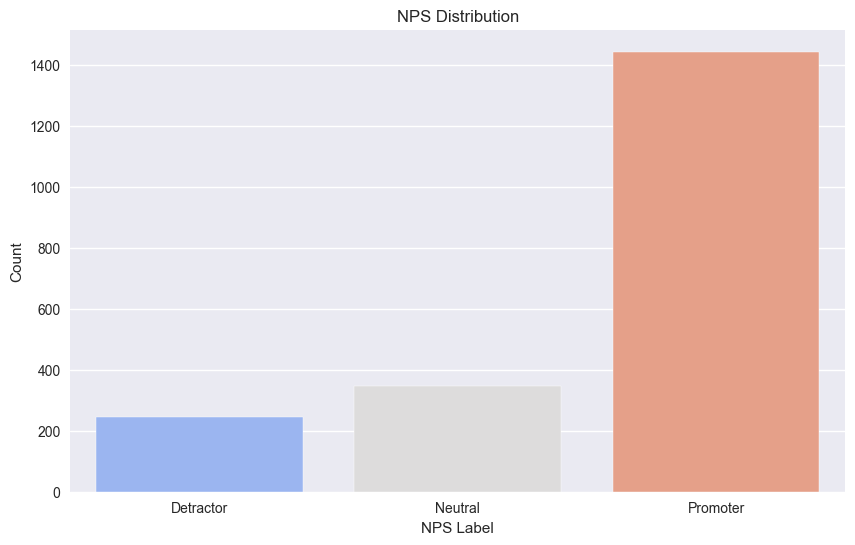

In [23]:
# Visualize NPS distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x='NPS Label', order=['Detractor', 'Neutral', 'Promoter'], palette='coolwarm')
plt.title('NPS Distribution')
plt.xlabel('NPS Label')
plt.ylabel('Count')
plt.show()

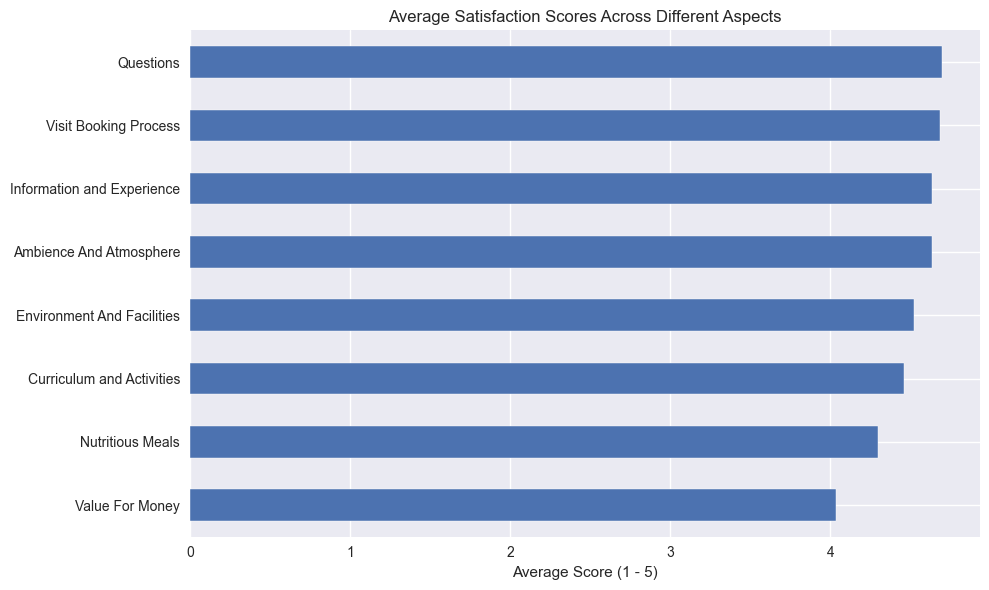

Satisfaction Scores Summary:
 Value For Money               4.033415
Nutritious Meals              4.299754
Curriculum and Activities     4.461916
Environment And Facilities    4.524324
Ambience And Atmosphere       4.636855
Information and Experience    4.636855
Visit Booking Process         4.686978
Questions                     4.699754
dtype: float64


In [39]:
satisfaction_avg = df_clean[statisfaction_columns].mean().sort_values(ascending=True)
plt.figure(figsize=(10, 6))
satisfaction_avg.plot(kind='barh')
plt.title('Average Satisfaction Scores Across Different Aspects')
plt.xlabel('Average Score (1 - 5)')
plt.tight_layout()
plt.show()

print("Satisfaction Scores Summary:\n",satisfaction_avg)


<Figure size 1200x600 with 0 Axes>

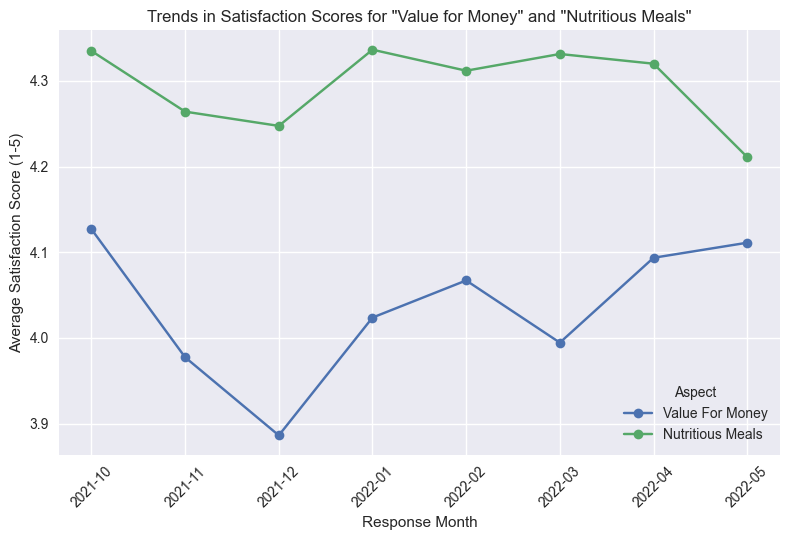

Trend Data Summary:
                          Value For Money  Nutritious Meals
Response Month (YYYY-MM)                                   
2022-01                          4.023697          4.336493
2022-02                          4.067055          4.311953
2022-03                          3.994429          4.331476
2022-04                          4.093525          4.320144
2022-05                          4.111111          4.211111


In [25]:
# Analyze satisfaction scores for "Value for Money" and "Nutritious Meals" over time
trend_columns = ['Value For Money', 'Nutritious Meals', 'Response Month (YYYY-MM)']
trend_data = df_clean[trend_columns].groupby('Response Month (YYYY-MM)').mean()

# Plot trends over time
plt.figure(figsize=(12, 6))
trend_data.plot(marker='o')
plt.title('Trends in Satisfaction Scores for "Value for Money" and "Nutritious Meals"')
plt.xlabel('Response Month')
plt.ylabel('Average Satisfaction Score (1-5)')
plt.xticks(rotation=45)
plt.legend(title='Aspect')
plt.tight_layout()
plt.show()

print("\
Trend Data Summary:")
print(trend_data.tail())

In [26]:
#import plotly.express as px
#import plotly.graph_objects as go
def analyze_feedback_categories(df_clean):
    # Extract all categories from both feedback columns
    categories = []
    for col in ['NPS Feedback Categories', 'Improvement Feedback Categories']:
        df_clean[col] = df_clean[col].fillna('')
        categories.extend([cat.strip('"') for row in df[col] for cat in str(row).split(',') if cat.strip()])

    category_counts = pd.Series(categories).value_counts()

    fig = plt.figure(figsize=(10, 6))
    plt.bar(
        x=category_counts.index,
        height=category_counts.values
    )
    plt.title('Most Common Feedback Categories')
    plt.xlabel('Feedback Categories')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability if needed
    plt.tight_layout()
    plt.show()



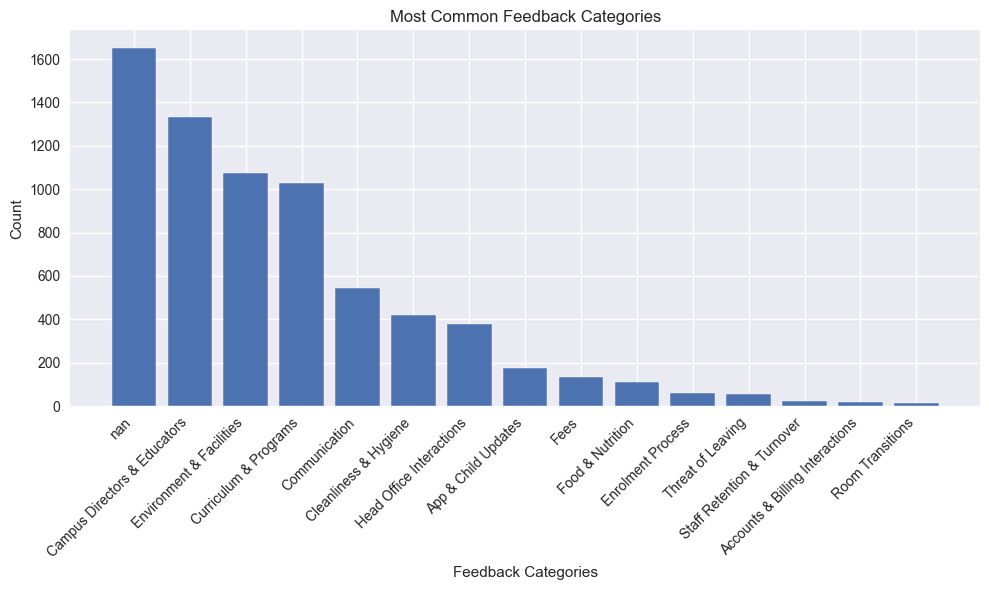

In [27]:
analyze_feedback_categories(df_clean)

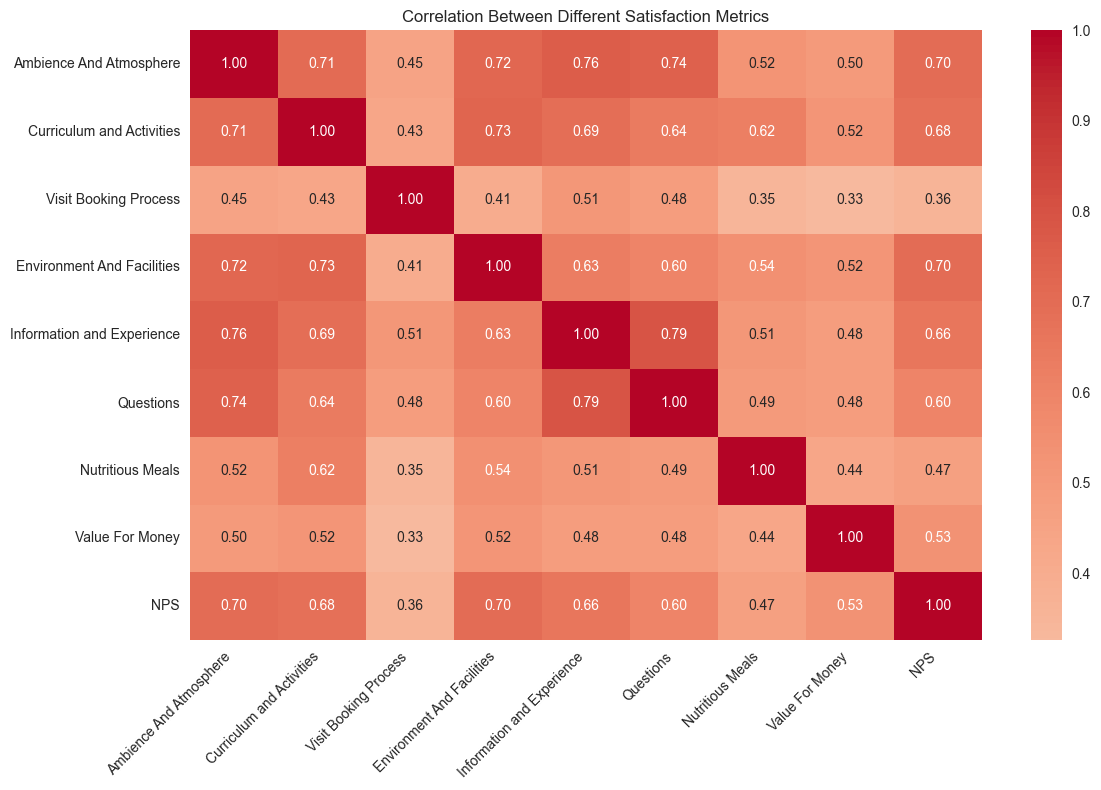

In [28]:
satisfaction_metrics = ['Ambience And Atmosphere', 'Curriculum and Activities',
                       'Visit Booking Process', 'Environment And Facilities',
                       'Information and Experience', 'Questions',
                       'Nutritious Meals', 'Value For Money', 'NPS']

correlation_matrix = df_clean[satisfaction_metrics].corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Between Different Satisfaction Metrics')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

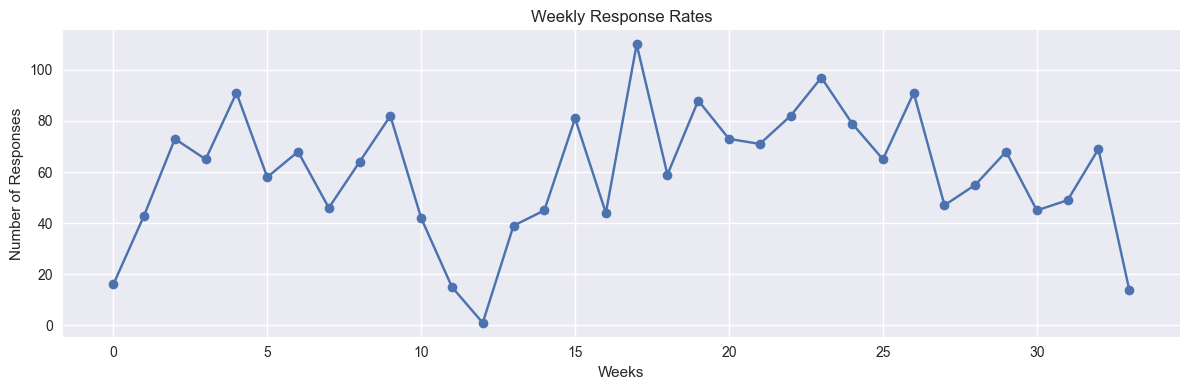

In [31]:
# Calculate response rates by week
df_clean['Response_Week'] = df_clean['Survey Response Date [GMT]'].dt.strftime('%Y-%W')
response_rates = df_clean.groupby('Response_Week').size().reset_index()
response_rates.columns = ['Week', 'Response Count']

# Plot response rates
plt.figure(figsize=(12, 4))
plt.plot(range(len(response_rates)), response_rates['Response Count'], marker='o')
plt.title('Weekly Response Rates')
plt.xlabel('Weeks')
plt.ylabel('Number of Responses')
plt.tight_layout()
plt.show()

In [37]:
import matplotlib.pyplot as plt

def create_trend_analysis(df_clean):
    # Group by month and calculate mean for each metric
    monthly_trends = df_clean.groupby('Response Month (YYYY-MM)').agg({
        'NPS': 'mean',
        'Ambience And Atmosphere': 'mean',
        'Curriculum and Activities': 'mean',
        'Value For Money': 'mean'


    }).round(2)

    # Create the figure and axis objects
    fig, ax = plt.subplots(figsize=(12, 6))

    # Define the metrics to plot
    metrics = ['NPS', 'Ambience And Atmosphere',
              'Curriculum and Activities', 'Value For Money']

    # Plot each metric
    for metric in metrics:
        ax.plot(monthly_trends.index, monthly_trends[metric], marker='o', label=metric)

    # Customize the plot
    ax.set_title('Monthly Trends in Key Metrics')
    ax.set_xlabel('Month')
    ax.set_ylabel('Score')
    ax.legend()
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()

    # Display the plot
    plt.show()

    # Optionally, you can return the figure object if needed for further manipulation
   # return fig

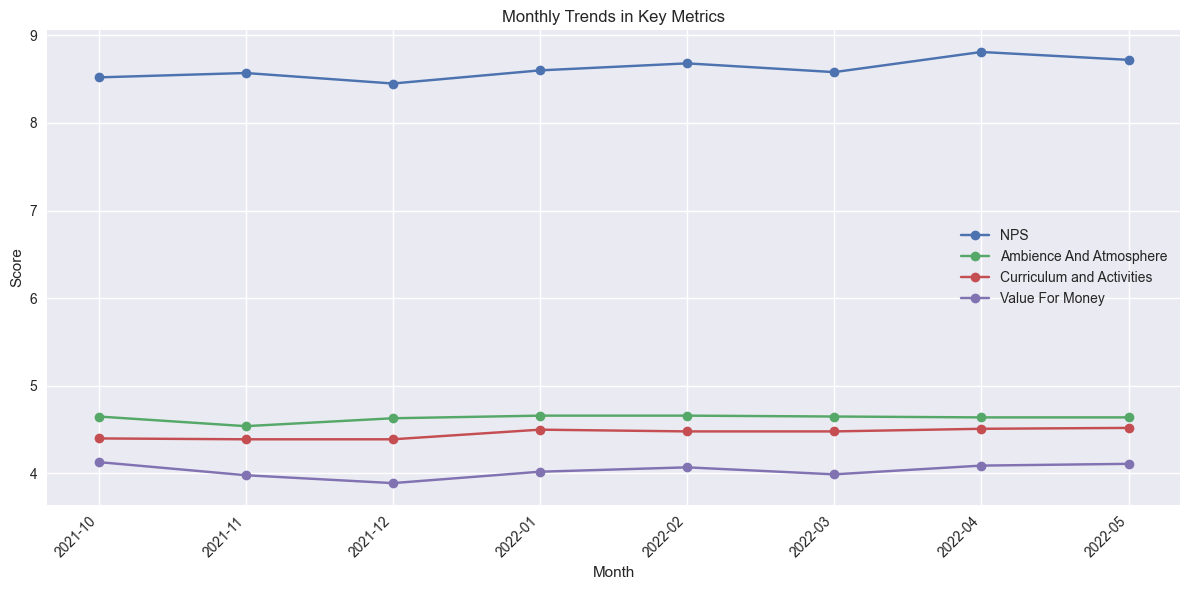

In [38]:
create_trend_analysis(df_clean)

In [40]:
df_clean.to_csv("df_clean.csv")